In [1]:
import pandas as pd

#read data
star_standard = pd.read_csv("Data/Stationary/throughput_Standard.csv")
star_mobile = pd.read_csv("Data/Stationary/throughput_Roam.csv")
star_fhp = pd.read_csv("Data/Stationary/throughput_FHP.csv")

#convert timestamps
star_standard["timestamp_start"] = pd.to_datetime(star_standard["timestamp_start"], unit="s")
star_standard["timestamp_end"] = pd.to_datetime(star_standard["timestamp_end"], unit="s")
star_mobile["timestamp_start"] = pd.to_datetime(star_mobile["timestamp_start"], unit="s")
star_mobile["timestamp_end"] = pd.to_datetime(star_mobile["timestamp_end"], unit="s")
star_fhp["timestamp_start"] = pd.to_datetime(star_fhp["timestamp_start"], unit="s")
star_fhp["timestamp_end"] = pd.to_datetime(star_fhp["timestamp_end"], unit="s")

#convert bits to mbits
star_standard["download"] = star_standard["download"] / 1e6
star_standard["upload"] = star_standard["upload"] / 1e6
star_mobile["download"] = star_mobile["download"] / 1e6
star_mobile["upload"] = star_mobile["upload"] / 1e6
star_fhp["download"] = star_fhp["download"] / 1e6
star_fhp["upload"] = star_fhp["upload"] / 1e6

#split into down and up direction
star_standard_down = star_standard[star_standard["mode"] == "down"]
star_standard_up = star_standard[star_standard["mode"] == "up"]
star_mobile_down = star_mobile[star_mobile["mode"] == "down"]
star_mobile_up = star_mobile[star_mobile["mode"] == "up"]
star_fhp_down = star_fhp[star_fhp["mode"] == "down"]
star_fhp_up = star_fhp[star_fhp["mode"] == "up"]

autobahn_data = pd.read_csv("Data/Autobahn/throughput.csv")
autobahn_data = autobahn_data[autobahn_data["Speed(km/h)"] > 0]
#print(autobahn_data.shape)
autobahn_data.dropna(subset=["download", "upload", "Speed(km/h)"], inplace=True)
autobahn_data["timestamp_start_dl"] = pd.to_datetime(autobahn_data["timestamp_start_dl"])

autobahn_data

,timestamp_start_dl,timestamp_end_dl,download,timestamp_start_ul,timestamp_end_ul,upload,timestamp_gmt_iphone,timestamp_local_iphone,Time(sec),Latitude,...,Distance(m),Speed(m/s),Average Speed(m/s),Course(deg),True Heading(deg),Magnetic Heading(deg),Heading Accuracy(deg),Glide Ratio,Heart Rate (bpm),Speed(km/h)
0,2024-04-19 16:23:00.001039872,2024-04-19 16:23:01.001035008,17.596184,2024-04-19 16:23:00.000116224,2024-04-19 16:23:01.000148992,12.348136,2024-04-19 16:23:00,2024-04-19 18:23:00,1038.996702,52.265172,...,4467.947433,10.066842,10.950538,237.238342,285.098328,281.671112,10.0,28.036316,0.0,36.240630
1,2024-04-19 16:23:01.001035008,2024-04-19 16:23:02.001338112,18.239273,2024-04-19 16:23:01.000148992,2024-04-19 16:23:02.000133888,13.205958,2024-04-19 16:23:01,2024-04-19 18:23:01,1039.994521,52.265139,...,4477.171047,9.315203,10.950538,244.855545,285.098328,281.671112,10.0,28.850665,0.0,33.534729
2,2024-04-19 16:23:02.001338112,2024-04-19 16:23:03.001261056,34.650412,2024-04-19 16:23:02.000133888,2024-04-19 16:23:03.000862976,3.484244,2024-04-19 16:23:02,2024-04-19 18:23:02,1040.994535,52.265117,...,4485.912290,8.818291,9.355561,255.614838,285.098328,281.671112,10.0,29.210636,0.0,31.745847
3,2024-04-19 16:23:03.001261056,2024-04-19 16:23:04.001039872,52.742025,2024-04-19 16:23:03.000862976,2024-04-19 16:23:04.001082880,0.000000,2024-04-19 16:23:03,2024-04-19 18:23:03,1041.995535,52.265108,...,4494.902499,8.802265,9.355561,263.228424,285.098328,281.671112,10.0,29.216660,0.0,31.688156
4,2024-04-19 16:23:04.001039872,2024-04-19 16:23:05.001303040,14.812041,2024-04-19 16:23:04.001082880,2024-04-19 16:23:05.001080064,0.000000,2024-04-19 16:23:04,2024-04-19 18:23:04,1042.995501,52.265117,...,4503.575368,8.942445,8.856852,271.465576,285.098328,281.671112,10.0,29.413259,0.0,32.192800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4856,2024-04-19 18:43:55.001046016,2024-04-19 18:43:56.001040896,241.759290,2024-04-19 18:43:55.000122112,2024-04-19 18:43:56.000116224,8.479539,2024-04-19 18:43:55,2024-04-19 20:43:55,1656.517866,53.178513,...,50390.423586,2.501858,1.710002,204.532654,42.167027,39.004318,10.0,96.490775,0.0,9.006687
4857,2024-04-19 18:43:56.001040896,2024-04-19 18:43:57.001054976,117.031520,2024-04-19 18:43:56.000116224,2024-04-19 18:43:57.000030976,9.511272,2024-04-19 18:43:56,2024-04-19 20:43:56,1657.517887,53.178510,...,50390.728856,2.468794,1.496252,204.532654,42.167027,39.004318,10.0,86.917707,0.0,8.887660
4858,2024-04-19 18:43:57.001054976,2024-04-19 18:43:58.001053952,135.741450,2024-04-19 18:43:57.000030976,2024-04-19 18:43:58.000088832,15.857575,2024-04-19 18:43:57,2024-04-19 20:43:57,1658.517908,53.178508,...,50391.034125,2.435731,1.282502,204.532654,42.167027,39.004318,10.0,77.344640,0.0,8.768632
4859,2024-04-19 18:43:58.001053952,2024-04-19 18:43:59.001056000,124.145476,2024-04-19 18:43:58.000088832,2024-04-19 18:43:59.000019200,12.940234,2024-04-19 18:43:58,2024-04-19 20:43:58,1659.517929,53.178505,...,50391.339395,2.402668,1.068751,204.532654,42.167027,39.004318,10.0,67.771573,0.0,8.649605


In [2]:
def split_repetitions(df):
    repetitions = []
    for rep in range(df["repetition"].max()+1):
        temp_df = df[df["repetition"] == rep]
        repetitions.append(temp_df)
    return repetitions

standard_repetitions_down = split_repetitions(star_standard_down)
standard_repetitions_up = split_repetitions(star_standard_up)
mobile_repetitions_down = split_repetitions(star_mobile_down)
mobile_repetitions_up = split_repetitions(star_mobile_up)
fhp_repetitions_down = split_repetitions(star_fhp_down)
fhp_repetitions_up = split_repetitions(star_fhp_up)

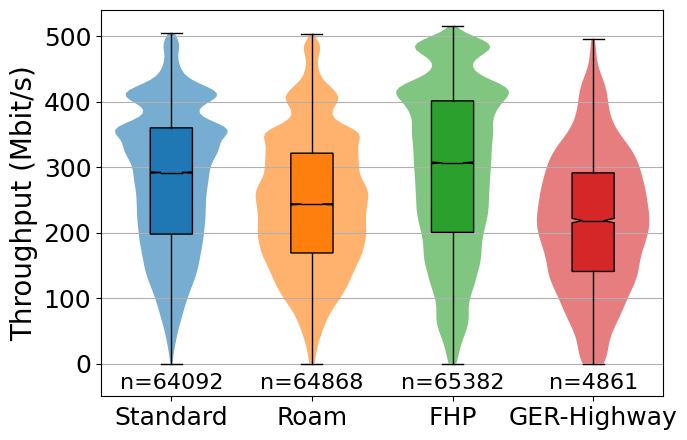

In [3]:
"""Fig. 6a - Throughput Boxplots download"""
import matplotlib.pyplot as plt

boxplot_data = [star_standard_down["download"], star_mobile_down["download"], star_fhp_down["download"], autobahn_data["download"]]
positions = [1,2,3,4]
# Plotting
fig, ax = plt.subplots(figsize=(7, 4.5))

# Create the Violin Plots
violin_parts = ax.violinplot(boxplot_data, positions=positions, widths=0.8, showmeans=False, showmedians=False, showextrema=False)

# Set the colors for the violin plot
cmap = plt.get_cmap("tab10")
violin_colors = [cmap(0), cmap(1), cmap(2), cmap(3), cmap(4), cmap(5), cmap(6), cmap(7)]
for pc, color in zip(violin_parts['bodies'], violin_colors):
    pc.set_facecolor(color)
    pc.set_alpha(0.6)  # Adjust transparency if needed


# Create the boxplot
box = ax.boxplot(boxplot_data, positions=positions, widths=0.3, notch=True, patch_artist=True)
# Set colors for each box plot
for patch, color in zip(box['boxes'], violin_colors):
    patch.set_facecolor(color)
# Set median line colors to black
for median in box['medians']:
    median.set(color='black')
# Annotate number of samples above each box plot
for i, data in enumerate(boxplot_data):
    sample_size = len(data)
    ax.text(positions[i], -45, f'n={sample_size}', ha='center', va='bottom', fontsize=16, color='black')


# Create custom legend
legend_labels = ['Standard', 'Roam', 'FHP', 'GER-Highway']
legend_colors = [cmap(i) for i in range(7)]
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in legend_colors]

fzsize = 20

custom_xtick_labels = ['Standard', 'Roam', 'FHP', 'GER-Highway']
ax.set_xticklabels(custom_xtick_labels)
y_ticks = [0, 100, 200, 300, 400, 500]

plt.tick_params(axis='y', labelsize=fzsize-2)
plt.tick_params(axis='x', labelsize=fzsize-2)
plt.yticks(y_ticks)
plt.ylim(-50, 540)
ax.set_ylabel('Throughput (Mbit/s)', size=fzsize)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("Plots/Fig6a.pdf", format="pdf")

In [4]:
print("Standard:")
print(star_standard_down["download"].describe())
print("----------------------------")
print("Roam:")
print(star_mobile_down["download"].describe())
print("----------------------------")
print("FHP:")
print(star_fhp_down["download"].describe())
print("----------------------------")
print("GER-Highway:")
print(autobahn_data["download"].describe())

Standard:
count    64092.000000
mean       279.562038
std        106.870684
min          0.000000
25%        197.714469
50%        291.782462
75%        359.984338
max        504.501270
Name: download, dtype: float64
----------------------------
Roam:
count    64868.000000
mean       245.227485
std        102.070308
min          0.000000
25%        168.911833
50%        243.228712
75%        321.324868
max        503.861165
Name: download, dtype: float64
----------------------------
FHP:
count    65382.000000
mean       294.653853
std        125.305432
min          0.000000
25%        200.362656
50%        306.557332
75%        401.221822
max        515.516545
Name: download, dtype: float64
----------------------------
GER-Highway:
count    4861.000000
mean      217.657938
std       104.253679
min         0.000000
25%       140.656993
50%       218.298475
75%       291.234212
max       495.145877
Name: download, dtype: float64


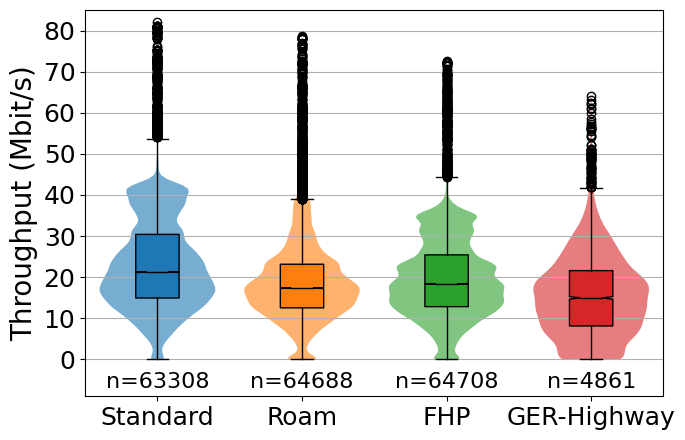

In [5]:
"""Fig. 6b - Throughput Boxplots upload"""
import matplotlib.pyplot as plt

boxplot_data = [star_standard_up["upload"], star_mobile_up["upload"], star_fhp_up["upload"], autobahn_data["upload"]]
positions = [1,2,3,4]
# Plotting
fig, ax = plt.subplots(figsize=(7, 4.5))

# Create the Violin Plots
violin_parts = ax.violinplot(boxplot_data, positions=positions, widths=0.8, showmeans=False, showmedians=False, showextrema=False)

# Set the colors for the violin plot
cmap = plt.get_cmap("tab10")
violin_colors = [cmap(i) for i in range(len(boxplot_data))]
for pc, color in zip(violin_parts['bodies'], violin_colors):
    pc.set_facecolor(color)
#    pc.set_edgecolor('black')
    pc.set_alpha(0.6)  # Adjust transparency if needed

# Create the boxplot
box = ax.boxplot(boxplot_data, positions=positions, widths=0.3, notch=True, patch_artist=True)
cmap = plt.get_cmap("tab10")
colors = [cmap(0), cmap(1), cmap(2), cmap(3)]
# Set colors for each box plot
for patch, color in zip(box['boxes'], violin_colors):
    patch.set_facecolor(color)
# Set median line colors to black
for median in box['medians']:
    median.set(color='black')
# Annotate number of samples above each box plot
for i, data in enumerate(boxplot_data):
    sample_size = len(data)
    ax.text(positions[i], -8, f'n={sample_size}', ha='center', va='bottom', fontsize=16, color='black')

# Create custom legend
legend_labels = ['Standard', 'Roam', 'FHP', 'GER-Highway']
legend_colors = [cmap(i) for i in range(7)]
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in legend_colors]
#ax.legend(handles, legend_labels, loc='upper right')
fzsize = 20

custom_xtick_labels = ['Standard', 'Roam', 'FHP', 'GER-Highway']
ax.set_xticklabels(custom_xtick_labels)
#ax.set_yscale("log")
#y_ticks = [0, 100, 200, 300, 400, 500]
y_ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80]
plt.yticks(y_ticks)

plt.tick_params(axis='y', labelsize=fzsize-2)
plt.tick_params(axis='x', labelsize=fzsize-2)
#plt.yticks(y_ticks)
plt.ylim(-9, 85)
ax.set_ylabel('Throughput (Mbit/s)', size=fzsize)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("Plots/Fig6b.pdf", format="pdf")

In [6]:
"""TABELLE INS PAPER PACKEN"""
print("Standard:")
print(star_standard_up["upload"].describe())
print("----------------------------")
print("Roam:")
print(star_mobile_up["upload"].describe())
print("----------------------------")
print("FHP:")
print(star_fhp_up["upload"].describe())
print("----------------------------")
print("GER-Highway:")
print(autobahn_data["upload"].describe())

Standard:
count    63308.000000
mean        22.892068
std         10.999659
min          0.000000
25%         14.909197
50%         21.219045
75%         30.396143
max         82.117814
Name: upload, dtype: float64
----------------------------
Roam:
count    64688.000000
mean        18.248810
std          9.096909
min          0.000000
25%         12.511587
50%         17.294808
75%         23.133612
max         78.678487
Name: upload, dtype: float64
----------------------------
FHP:
count    64708.000000
mean        19.366161
std          9.387297
min          0.000000
25%         12.811840
50%         18.372279
75%         25.412531
max         72.562323
Name: upload, dtype: float64
----------------------------
GER-Highway:
count    4861.000000
mean       15.620370
std        10.183006
min         0.000000
25%         8.108216
50%        14.943105
75%        21.579719
max        64.175360
Name: upload, dtype: float64
